In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_parquet('./data/green_tripdata_2023-01.parquet')

In [3]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00


In [106]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [107]:
#df= df[df.trip_type==2]

In [108]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00


In [109]:
df['duration'] = (df.lpep_dropoff_datetime - df.lpep_pickup_datetime)

In [110]:
df['duration'].iloc[0].total_seconds()/60

11.016666666666667

In [111]:
df.duration=df.duration.apply(lambda td: td.total_seconds()/60)

In [112]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00,6.766667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00,6.333333
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00,5.966667


/tmp/ipykernel_29820/3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

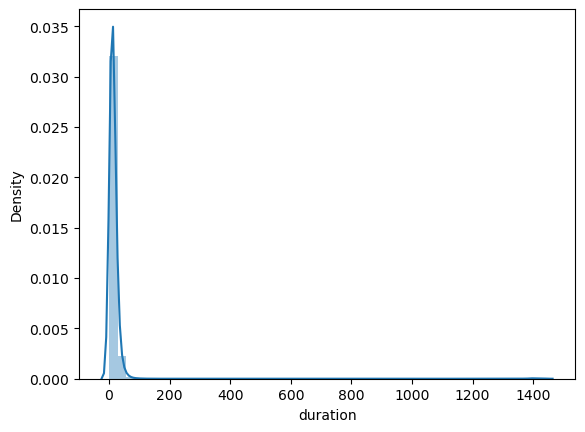

In [113]:
sns.distplot(df.duration)

In [114]:
df.duration.describe()

count    68211.000000
mean        18.097271
std         74.925631
min          0.000000
25%          7.216667
50%         11.400000
75%         17.483333
max       1439.883333
Name: duration, dtype: float64

In [115]:
df.duration.describe(percentiles=[0.95, .98, .99])

count    68211.000000
mean        18.097271
std         74.925631
min          0.000000
50%         11.400000
95%         33.266667
98%         45.616667
99%         58.115000
max       1439.883333
Name: duration, dtype: float64

In [116]:
df=df[(df.duration >=1) & (df.duration<=64)]
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00,6.766667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00,6.333333
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00,5.966667


In [117]:
categorical_columns=['PULocationID', 'DOLocationID']
numerical_columns=['trip_distance', 'passenger_count']

In [118]:
df[categorical_columns].dtypes

PULocationID    int64
DOLocationID    int64
dtype: object

In [119]:
df[categorical_columns] = df[categorical_columns].astype(str)

In [120]:
df[categorical_columns].dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [121]:
df[categorical_columns+numerical_columns].isnull().sum()

PULocationID          0
DOLocationID          0
trip_distance         0
passenger_count    4299
dtype: int64

In [122]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy='mean')
df.passenger_count = si.fit_transform(df.passenger_count.values.reshape(-1,1))

In [123]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.5,4.03,0.0,None,1.0,24.18,1.0,1.0,2.75,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.5,2.64,0.0,None,1.0,15.84,1.0,1.0,0.00,6.766667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.5,1.94,0.0,None,1.0,11.64,1.0,1.0,0.00,6.333333
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.5,1.70,0.0,None,1.0,10.20,1.0,1.0,0.00,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.5,0.00,0.0,None,1.0,8.00,1.0,1.0,0.00,5.966667


In [124]:
df[categorical_columns+numerical_columns].isnull().sum()

PULocationID       0
DOLocationID       0
trip_distance      0
passenger_count    0
dtype: int64

In [125]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()

In [126]:
df[categorical_columns+numerical_columns].iloc[:5].to_dict(orient='records')

[{'PULocationID': '166',
  'DOLocationID': '143',
  'trip_distance': 2.58,
  'passenger_count': 1.0},
 {'PULocationID': '24',
  'DOLocationID': '43',
  'trip_distance': 1.81,
  'passenger_count': 1.0},
 {'PULocationID': '223',
  'DOLocationID': '179',
  'trip_distance': 0.0,
  'passenger_count': 1.0},
 {'PULocationID': '41',
  'DOLocationID': '238',
  'trip_distance': 1.3,
  'passenger_count': 1.0},
 {'PULocationID': '41',
  'DOLocationID': '74',
  'trip_distance': 1.1,
  'passenger_count': 1.0}]

In [127]:
train_dicts=df[categorical_columns+numerical_columns].to_dict(orient='records')

In [128]:
X_train = dv.fit_transform(train_dicts)

In [129]:
target='duration'
y_train = df[target].values

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
lin_reg = LinearRegression()

In [132]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [133]:
y_pred=lin_reg.predict(X_train)

/tmp/ipykernel_29820/1505421196.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_29820/1505421196.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


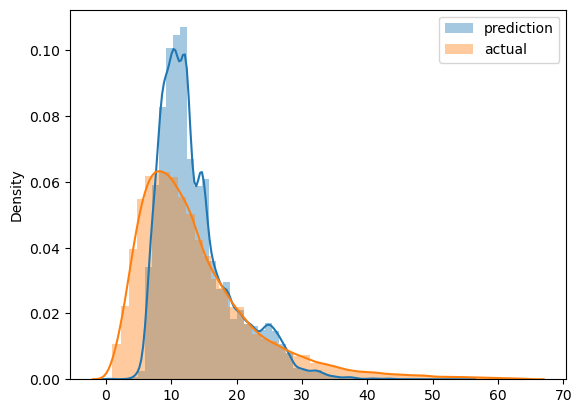

In [134]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')
plt.legend()

In [135]:
from sklearn.metrics import mean_squared_error

In [137]:
mean_squared_error(y_train, y_pred, squared=False)

7.165560817037577

In [186]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    
    df['duration'] = (df.lpep_dropoff_datetime - df.lpep_pickup_datetime)
    df.duration=df.duration.apply(lambda td: td.total_seconds()/60)
    
    df=df[(df.duration >=1) & (df.duration<=64)]
    
    categorical_columns=['PULocationID', 'DOLocationID']
    df[categorical_columns] = df[categorical_columns].astype(str)
    
    return df

In [187]:
df_train = read_dataframe('./data/green_tripdata_2023-01.parquet')
df_val = read_dataframe('./data/green_tripdata_2023-02.parquet')

In [188]:
def preprocessing(df, si=None, dv=None):
    
    df['PU_DO'] = df['PULocationID'] + '_' + df['DOLocationID']
    
    #categorical_columns=['PULocationID', 'DOLocationID']
    categorical_columns=['PU_DO']
    numerical_columns=['trip_distance', 'passenger_count']
    
   
    
    target='duration'
    y = df[target].values
        
    if dv==None and si==None:
        si = SimpleImputer(missing_values=np.nan, strategy='mean')
        df.passenger_count = si.fit_transform(df.passenger_count.values.reshape(-1,1))
        
        dicts=df[categorical_columns+numerical_columns].to_dict(orient='records')
        dv = DictVectorizer()
        X = dv.fit_transform(dicts)
        
        return X, y, si, dv
    else:
        df.passenger_count = si.transform(df.passenger_count.values.reshape(-1,1))
        
        dicts=df[categorical_columns+numerical_columns].to_dict(orient='records')
        X = dv.transform(dicts)
        
        return X, y
    

In [189]:
X_train, y_train, si, dv = preprocessing(df_train)
print(X_train.shape)
print(y_train.shape)
print(df_train.shape)

(66016, 5728)
(66016,)
(66016, 22)


In [190]:
X_test, y_test= preprocessing(df_val, si, dv)
print(X_test.shape)
print(y_test.shape)
print(df_val.shape)

(62664, 5728)
(62664,)
(62664, 22)


In [202]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    error = mean_squared_error(y_test, y_pred, squared=False)
    
    return model, error

In [203]:
import pickle

In [204]:
model, error = train_evaluate_model(LinearRegression(), X_train, y_train, X_test, y_test)
print(error)

6.165458764143339


In [205]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((si, dv, model), f_out)

In [206]:
from sklearn.linear_model import Lasso

In [207]:
model, error = train_evaluate_model(Lasso(alpha=0.0001), X_train, y_train, X_test, y_test)
print(error)

6.207308733712145


In [208]:
with open('models/lasso_reg.bin', 'wb') as f_out:
    pickle.dump((si, dv, model), f_out)

In [209]:
from sklearn.linear_model import Ridge

In [210]:
model, error = train_evaluate_model(Ridge(0.0001), X_train, y_train, X_test, y_test)
print(error)

6.155309095117129


In [211]:
with open('models/ridge_reg.bin', 'wb') as f_out:
    pickle.dump((si, dv, model), f_out)